# Importing PLEASE START READING AT CONTEXT 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns 

## Selecting Url to work with 
url="https://raw.githubusercontent.com/JuanBecerra07/bootCAMP-DS_JUAN-BECERRA-/main/Actividad%201/healthcare_dataset.csv"
df=pd.read_csv(url,sep=',',encoding='utf-8')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


# Checking for nulls ans check the shape of the df 


In [3]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Checking most present Blood Type 

In [4]:
Bt=df['Blood Type']
Bt.value_counts()

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

# AB- Most affected bllod type 

<Axes: xlabel='Blood Type'>

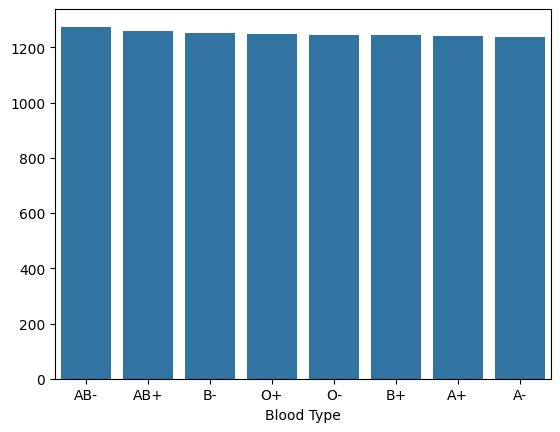

In [5]:
blood = df['Blood Type'].value_counts()
sns.barplot(x=blood.index , y= blood.values)


# Mayor Gender affected in total is female

<Axes: xlabel='Gender', ylabel='count'>

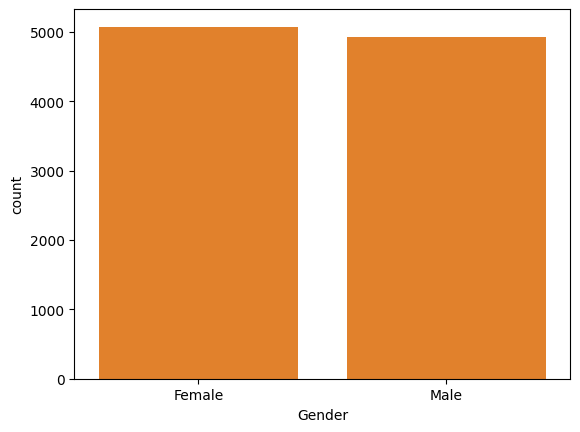

In [6]:
Gender =df['Gender'].value_counts()
sns.barplot(Gender)
sns.barplot(x=Gender.index , y = Gender.values)

# Since Asthma is the most likely condition lets separate sex and age to find a relation 

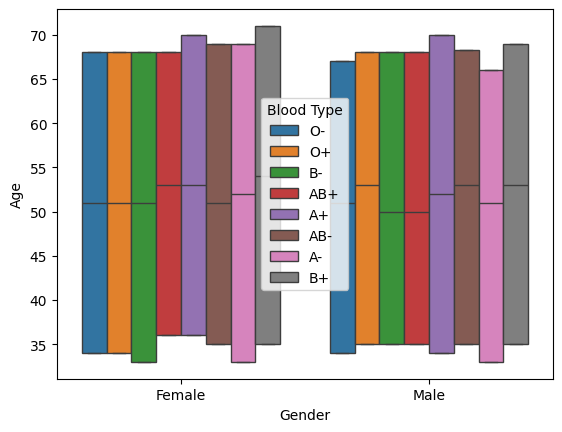

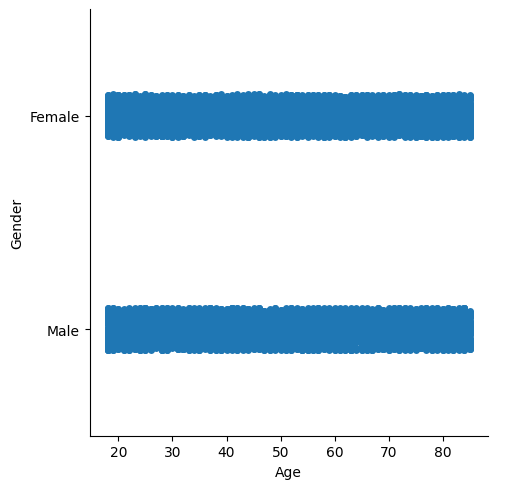

In [7]:
ill_asma = df[df['Medical Condition']== 'Asthma']
##ill_asma = df['Age']
##ill_asma.value_counts()
ill_asma
ill_asma =df[['Blood Type','Gender','Age']]
sns.boxplot(data = ill_asma ,x= 'Gender',y= 'Age', hue = 'Blood Type', showfliers = False, whis = False )
sns.catplot(data=ill_asma, x="Age", y="Gender")

##sns.violinplot(data = ill_asma , x= 'Gender', y= 'Age', hue = 'Blood Type')





# Billing amount relation with Gender and Provders
 For the moment we need to normalize the values inside the colunm billing amount, to findout in which health provider we have the most billing amount.
 With the grafics we can notice that in females the BLUE CROSS is mayor one and for the males is Aetna 


<Axes: xlabel='Gender', ylabel='Billing Amount'>

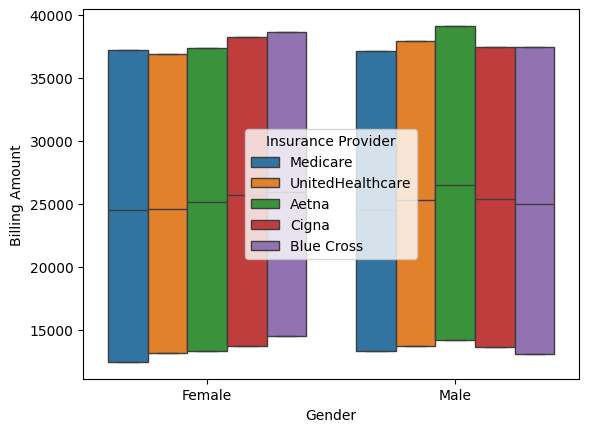

In [8]:

df.columns
bills= df['Billing Amount']
# WE NEED TO ROUND THESE NUMS UP WITH THE FOLLWING LINE
bill_fix =bills.round().astype(int)
df['Billing Amount']=bill_fix

New = df[['Gender','Insurance Provider','Billing Amount','Medication']]

sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Insurance Provider',showfliers = False,whis=False)





# Relation between Meds, Gender and billing amount
On this section we tried to find the relation between the billing amount and the medication, we can see that the medication most used on both gender are Aspirin and Lipitor

<Axes: xlabel='Gender', ylabel='Billing Amount'>

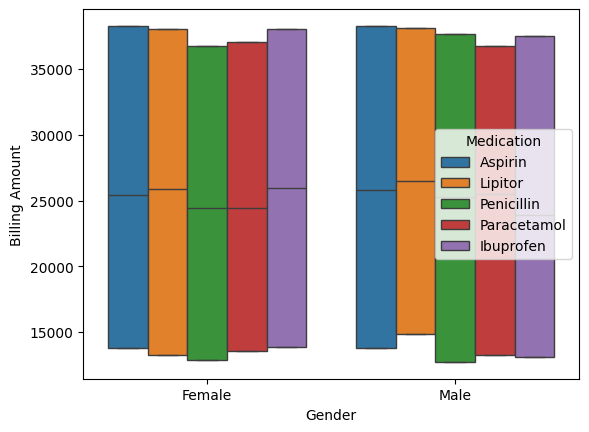

In [112]:
sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Medication',showfliers = False, whis=False)

Text(0.5, 1.0, 'Frecuencia por Enfermedad')

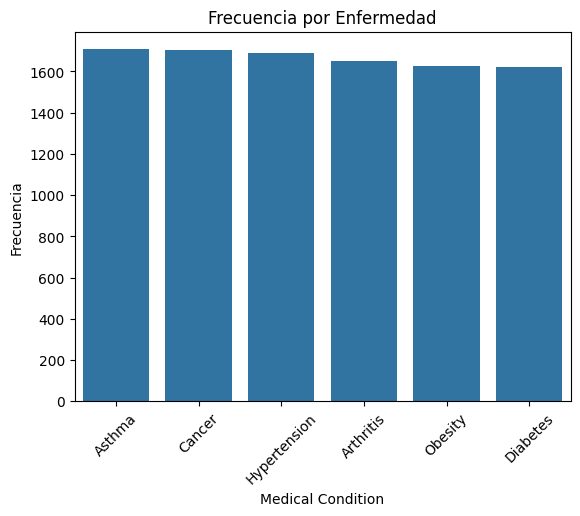

In [10]:

x=df['Medical Condition'].value_counts().index
y=df['Medical Condition'].value_counts().values 
sns.barplot(x=x, y=y)
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por Enfermedad')



(0.0, 1200.0)

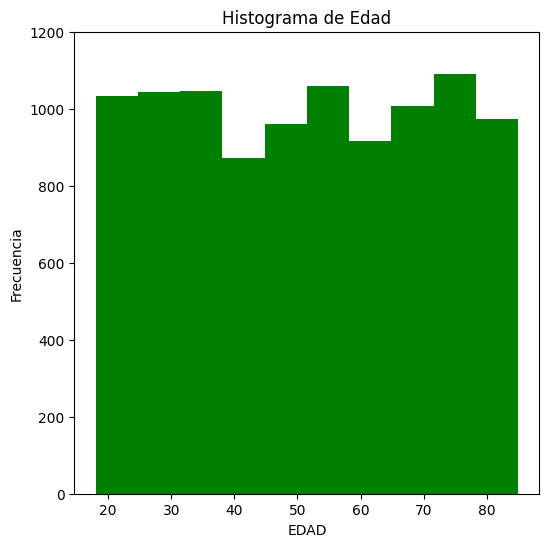

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(x= df.Age, density=False, orientation='vertical', color='g')
ax.set_xlabel('EDAD')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Edad')
ax.set_ylim(0,1200)



# Context 

Inside the data base we find a vast amount of information which we need to filter to answer a specific question, WORLD WIDE there are illness that are most present in the human population and takes a very heavy loud to the healthcare system.
So we have been asked to find one whay illnes is the most present inside the information given and how does this have a corelation with the medication , age , billing amount and gender.
We also need to know which HealthCare provider is get the most amount of profit from these illnes.

# Problem Questions 
 * 1 which illnes is ths most present 
 * 2 which gender is the most affect by it 
 * 3 which health care provider get the most profit (if possible separate them by gender)
 * 4 which medicadition is the most present due to these illness 
 * 5 In which range of Age is the illnes most present
 * 6 which health care provider get the most profit inside the most affected illnes
 * 7 Which medication is the most present in the range of age most affected
 
 
 

# Question 1

* Most present illness is ASTHMA

/tmp/ipykernel_33519/450865681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y,palette="Set2")


Text(0.5, 1.0, 'Frec Med Condition')

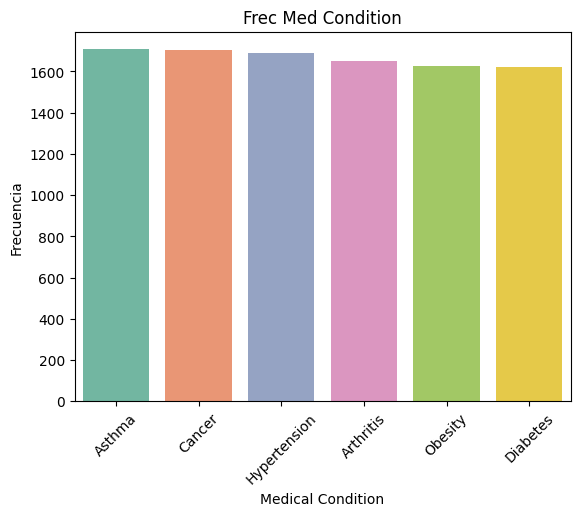

In [111]:
x=df['Medical Condition'].value_counts().index
y=df['Medical Condition'].value_counts().values 
sns.barplot(x=x, y=y,palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.ylabel('Frecuencia')
plt.title('Frec Med Condition')



# Question 2
* Most affected GENDER inside the asthma community is FEMALE

/tmp/ipykernel_33519/2952073491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= ill_asma['Gender'].value_counts().index,y=ill_asma['Gender'].value_counts().values,palette="Reds")


<Axes: xlabel='Gender'>

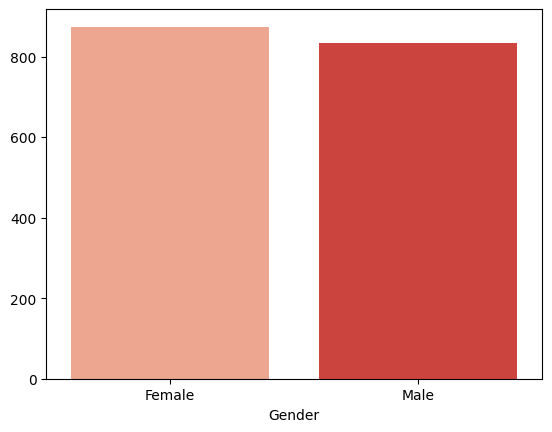

In [98]:
ill_asma = df[df['Medical Condition']== 'Asthma']
sns.barplot( x= ill_asma['Gender'].value_counts().index,y=ill_asma['Gender'].value_counts().values,palette="Reds")

# Question 3
* We can now start to see the relation divided by gender, where in the female side the provider with the most amount of billing is BLUE CROSS and in the male side we have AETNA

<Axes: xlabel='Gender', ylabel='Billing Amount'>

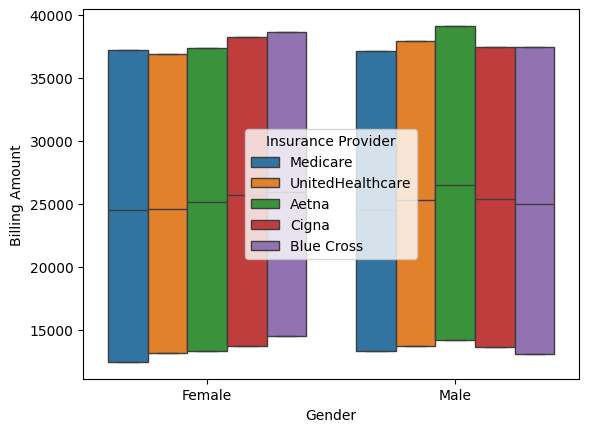

In [113]:
bills= df['Billing Amount']
# WE NEED TO ROUND THESE NUMS UP WITH THE FOLLWING LINE
bill_fix =bills.round().astype(int)
df['Billing Amount']=bill_fix

New = df[['Gender','Insurance Provider','Billing Amount','Medication']]

sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Insurance Provider',showfliers = False,whis=False)

# QUESTION 4 
* For both sides we can  see  ASPIRIN AND LIPITOR are the most present medicatrion not to far above Ibuprofen and Penicillin 

<Axes: xlabel='Gender', ylabel='Billing Amount'>

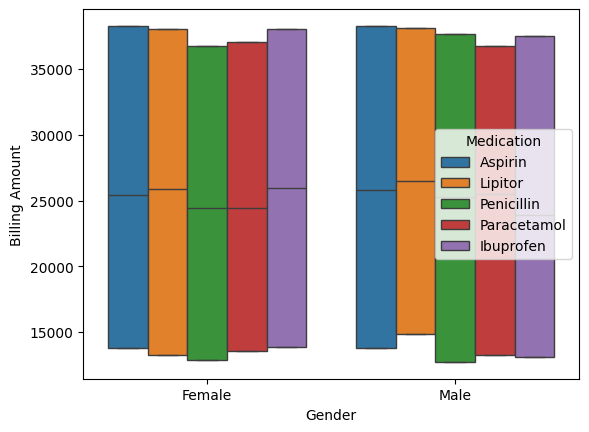

In [114]:
sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Medication',showfliers = False, whis=False)

QUESTIONS 5 6 7 
* we can appreciate that the provider with the most billing profit inside the asthma affected community is Cigna
* Also the range of age most affected is between 65 and 85
* The medication that is mostly commen is lipitor and aspirin 

/tmp/ipykernel_33519/3104552576.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cigna=ill_asma[df['Insurance Provider'] =='Cigna']
/tmp/ipykernel_33519/3104552576.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cigna1= Cigna[df['Age'].between(65,85) ]
/tmp/ipykernel_33519/3104552576.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(data = ill_asma,x='Insurance Provider', y = 'Billing Amount',ax=axes[0],ci=False,palette = "Blues")
/tmp/ipykernel_33519/3104552576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = ill_asma,x='Insurance Provider', y = 'Billing Amount',ax=axes[0],ci=False,palette = "Blues")
/tmp/ipykernel_33519/3104552576.py:12: FutureWarning: 

Passing `palette` w

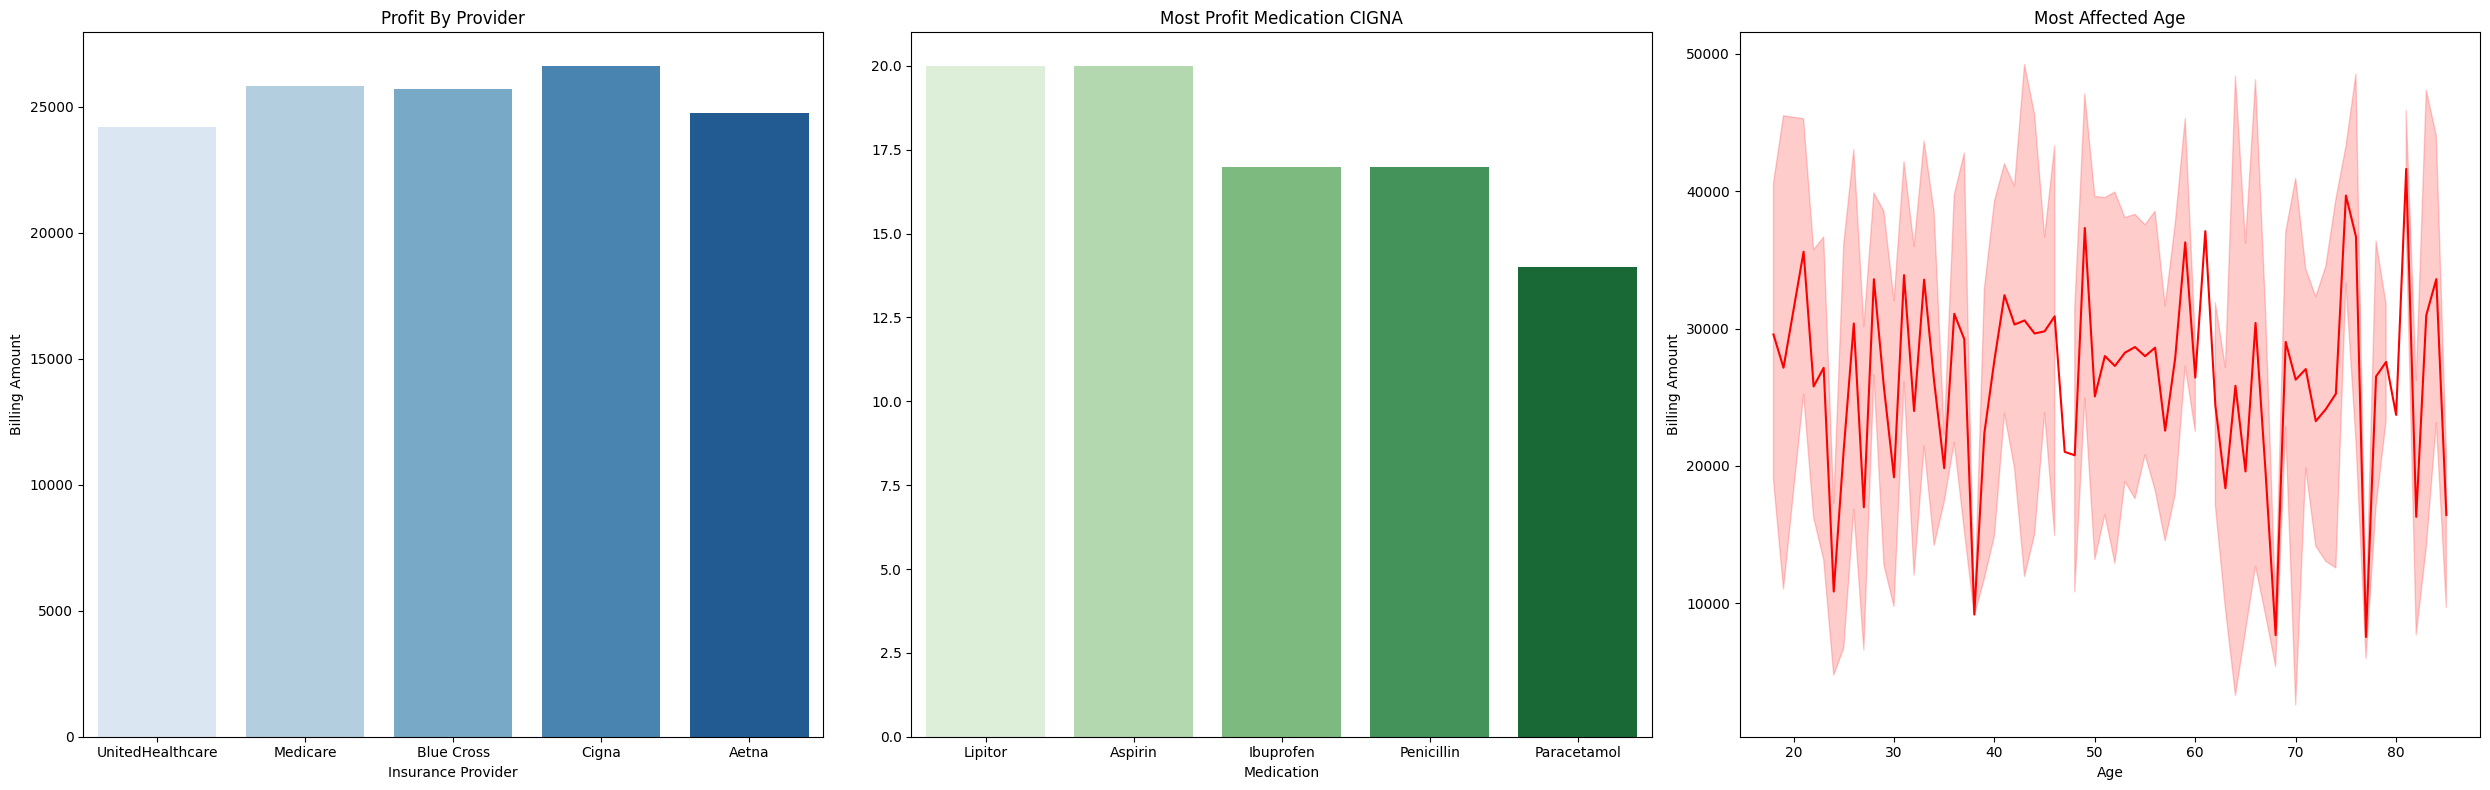

In [94]:
ill_asma = df[df['Medical Condition']== 'Asthma']
Cigna=ill_asma[df['Insurance Provider'] =='Cigna']

Cigna1= Cigna[df['Age'].between(65,85) ]
Cigna1
##sns.barplot(data = Cigna1,x='Age', y = 'Billing Amount')
Meds_Cigna = Cigna1['Medication']
Meds_Cigna.value_counts()

fig, axes = plt.subplots(ncols=3, figsize=(25, 8))
ax = sns.barplot(data = ill_asma,x='Insurance Provider', y = 'Billing Amount',ax=axes[0],ci=False,palette = "Blues")
ax = sns.barplot(x = Meds_Cigna.value_counts().index , y= Meds_Cigna.value_counts().values,ax=axes[1],palette = "Greens")
ax=sns.lineplot(data = Cigna,x='Age', y = 'Billing Amount',ax=axes[2],color="RED")

axes[0].set_title('Profit By Provider')
axes[1].set_title('Most Profit Medication CIGNA')
axes[2].set_title('Most Affected Age')
plt.tight_layout()





